# E-Commerce Data Analysis using RFM(K-mean clustering)

#### performing analysis on the reatil store dataset!

##### (following is the actual read data of a UK retailer store)

In [14]:
# importing the libraries
import pandas as pd

In [9]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# to scale our data 
from sklearn.preprocessing import scale

# to perform k-means clustering
from sklearn.cluster import KMeans


### During this case study we will try to findout weather the customers could be segmented into different categories or not!

In [16]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

### Reading the dataset

In [23]:
#reading the dataset 
retail = pd.read_excel("RetailPulseAssignmentData.xlsx")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [33]:
retail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [26]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [37]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


### removing the missing values 

In [38]:
retail_1 = retail.dropna()

In [39]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [40]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [43]:
# no of unique customers
retail_1.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

In [51]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Country', ylabel='count'>

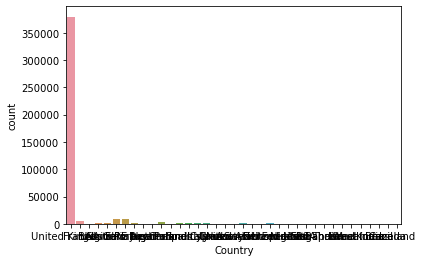

In [52]:
sns.countplot(retail_1.Country)

### mainly we have the data of uk let's consider dropping out the other contries 

In [55]:
retail_2 = retail_1[retail_1.Country == 'United Kingdom']
retail_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [57]:
retail_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379423 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      379423 non-null  object        
 1   StockCode    379423 non-null  object        
 2   Description  379423 non-null  object        
 3   Quantity     379423 non-null  int64         
 4   InvoiceDate  379423 non-null  datetime64[ns]
 5   Price        379423 non-null  float64       
 6   Customer ID  379423 non-null  float64       
 7   Country      379423 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.1+ MB


In [58]:
retail_2.describe()

,Quantity,Price,Customer ID
count,379423.000000,379423.000000,379423.000000
mean,11.451517,3.653249,15559.935694
std,68.943709,68.743746,1593.744626
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,14210.000000
50%,4.000000,1.950000,15581.000000
75%,12.000000,3.750000,16938.000000
max,10000.000000,25111.090000,18287.000000


# RFM
Recency: since how long the customer has'nt appeared.   
Frequency: how offen does the customer appear.             
Monitory: how much customer invested

### Recency:

In [162]:
retail_2.InvoiceDate.max() - retail_2.InvoiceDate.min()

Timedelta('373 days 12:16:00')

In [163]:
# let's create a recency feature 
min_date = retail_2.InvoiceDate.min()
retail_2['recency'] = retail_2.InvoiceDate - min_date

In [164]:
RECENCY = retail_2.groupby('Customer ID')['recency'].max().reset_index()
RECENCY.head()

,Customer ID,recency
0,12346.0,307 days 08:48:00
1,12608.0,334 days 03:04:00
2,12745.0,252 days 02:29:00
3,12746.0,211 days 00:34:00
4,12747.0,369 days 07:53:00


### Frequency:

In [165]:
retail_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,recency,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0 days,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0 days,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0 days,30.0


In [166]:
frequency = retail_2.groupby('Customer ID')['Invoice'].nunique().reset_index()
frequency.head()

,Customer ID,Invoice
0,12346.0,15
1,12608.0,1
2,12745.0,2
3,12746.0,3
4,12747.0,22


### Monitory:

In [167]:
retail_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,recency,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0 days,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0 days,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0 days,30.0


In [168]:
retail_2['amount'] = retail_2['Quantity']*retail_2['Price']
retail_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,recency,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0 days,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0 days,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0 days,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0 days,30.0


In [169]:
monitory = retail_2.groupby('Customer ID').amount.sum().reset_index()

In [170]:
monitory.head()

,Customer ID,amount
0,12346.0,-64.68
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,230.85
4,12747.0,4968.58


In [171]:
rfm = RECENCY.merge(frequency, on='Customer ID', how = "left")

In [172]:
# correcting the invoice column name as frequency
rfm.rename(columns={'Invoice': 'frequency'}, inplace = True)
rfm

,Customer ID,recency,frequency
0,12346.0,307 days 08:48:00,15
1,12608.0,334 days 03:04:00,1
2,12745.0,252 days 02:29:00,2
3,12746.0,211 days 00:34:00,3
4,12747.0,369 days 07:53:00,22
...,...,...,...
4030,18283.0,356 days 07:45:00,6
4031,18284.0,309 days 04:46:00,2
4032,18285.0,78 days 02:39:00,1
4033,18286.0,262 days 04:12:00,3


In [173]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035 entries, 0 to 4034
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer ID  4035 non-null   float64        
 1   recency      4035 non-null   timedelta64[ns]
 2   frequency    4035 non-null   int64          
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 126.1 KB


In [174]:
# let's make a monitory column too
rfm = rfm.merge(monitory, on='Customer ID', how = "left")

In [175]:
rfm

,Customer ID,recency,frequency,amount
0,12346.0,307 days 08:48:00,15,-64.68
1,12608.0,334 days 03:04:00,1,415.79
2,12745.0,252 days 02:29:00,2,723.85
3,12746.0,211 days 00:34:00,3,230.85
4,12747.0,369 days 07:53:00,22,4968.58
...,...,...,...,...
4030,18283.0,356 days 07:45:00,6,641.77
4031,18284.0,309 days 04:46:00,2,436.68
4032,18285.0,78 days 02:39:00,1,427.00
4033,18286.0,262 days 04:12:00,3,1188.43


In [176]:
# let's takeout the days from recency
rfm['recency'] = rfm['recency'].dt.days
rfm

,Customer ID,recency,frequency,amount
0,12346.0,307,15,-64.68
1,12608.0,334,1,415.79
2,12745.0,252,2,723.85
3,12746.0,211,3,230.85
4,12747.0,369,22,4968.58
...,...,...,...,...
4030,18283.0,356,6,641.77
4031,18284.0,309,2,436.68
4032,18285.0,78,1,427.00
4033,18286.0,262,3,1188.43


In [180]:
rfm.head()

,Customer ID,recency,frequency,amount
0,12346.0,307,15,-64.68
1,12608.0,334,1,415.79
2,12745.0,252,2,723.85
3,12746.0,211,3,230.85
4,12747.0,369,22,4968.58


In [181]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4035 non-null   float64
 1   recency      4035 non-null   int64  
 2   frequency    4035 non-null   int64  
 3   amount       4035 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 126.2 KB


<AxesSubplot:xlabel='recency'>

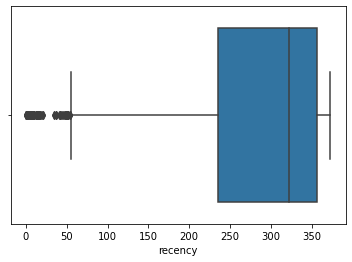

In [202]:
sns.boxplot(rfm['recency'])

<AxesSubplot:xlabel='frequency'>

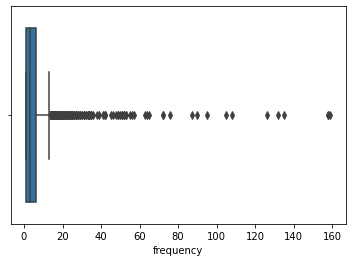

In [204]:
sns.boxplot(rfm['frequency']) # outliers need to be removed

<AxesSubplot:xlabel='amount'>

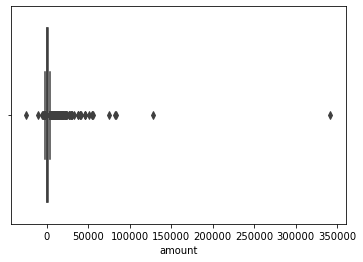

In [206]:
sns.boxplot(rfm['amount']) # outliers need to be taken care off

## Outliers Treatment

In [224]:
import numpy as np
recency_25 = np.percentile(rfm['recency'], 25)
recency_75 = np.percentile(rfm['recency'], 75)
IQR = recency_75 - recency_25
print(recency_25, recency_75, IQR)

236.0 357.0 121.0


<AxesSubplot:xlabel='recency'>

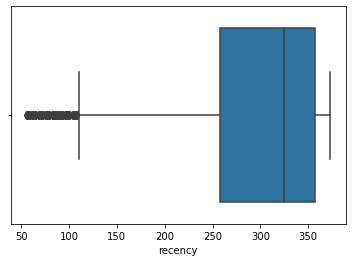

In [225]:
rfm_filtered = rfm[(rfm['recency'] < (recency_75 + 1.5 * IQR)) & (rfm['recency'] > (recency_25 - 1.5 * IQR))]
sns.boxplot(rfm_filtered['recency'])

In [226]:
rfm = rfm_filtered 

1.0 6.0 5.0


<AxesSubplot:xlabel='frequency'>

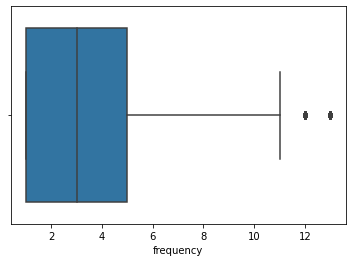

In [227]:
frequency_25 = np.percentile(rfm['frequency'], 25)
frequency_75 = np.percentile(rfm['frequency'], 75)
IQR = frequency_75 - frequency_25
print(frequency_25, frequency_75, IQR)
rfm_filtered = rfm[(rfm['frequency'] < (frequency_75 + 1.5 * IQR)) & (rfm['frequency'] > (frequency_25 - 1.5 * IQR))]
sns.boxplot(rfm_filtered['frequency'])

In [228]:
rfm = rfm_filtered

274.47 1318.655 1044.185


<AxesSubplot:xlabel='amount'>

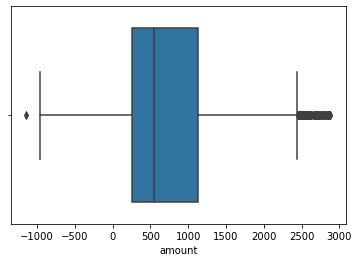

In [229]:
amount_25 = np.percentile(rfm['amount'], 25)
amount_75 = np.percentile(rfm['amount'], 75)
IQR = amount_75 - amount_25
print(amount_25, amount_75, IQR)
rfm_filtered = rfm[(rfm['amount'] < (amount_75 + 1.5 * IQR)) & (rfm['amount'] > (amount_25 - 1.5 * IQR))]
sns.boxplot(rfm_filtered['amount'])

In [230]:
rfm = rfm_filtered

In [237]:
# now let's normalise the data 

<AxesSubplot:xlabel='frequency', ylabel='Density'>

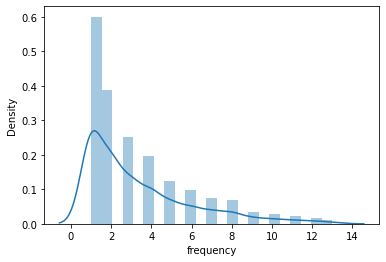

In [242]:
sns.distplot(rfm["frequency"])

<AxesSubplot:xlabel='recency', ylabel='Density'>

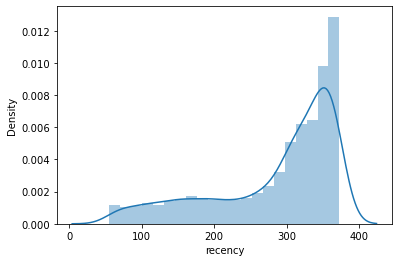

In [243]:
sns.distplot(rfm["recency"])


<AxesSubplot:xlabel='amount', ylabel='Density'>

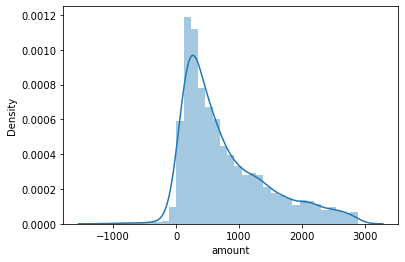

In [244]:
sns.distplot(rfm["amount"])

In [249]:
# let's standerize the data!
columns = rfm.columns

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm)
scaled_df = pd.DataFrame(scaled_data, columns=columns)

In [253]:
scaled_df.head()

,Customer ID,recency,frequency,amount
0,-1.889664,0.567612,-0.878228,-0.526372
1,-1.802732,-0.380857,-0.502233,-0.072674
2,-1.802097,-0.855092,-0.126238,-0.798744
3,-1.800194,0.787379,1.753736,2.484685
4,-1.782426,-0.045423,-0.878228,-0.373706


In [254]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

In [264]:
obj=KMeans(n_clusters=3)
obj.fit(rfm)

KMeans(n_clusters=3)

In [265]:
labels=obj.labels_
centers = obj.cluster_centers_

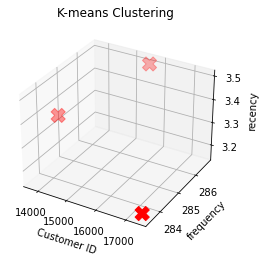

In [266]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(rfm['Customer ID'], rfm['frequency'], rfm['recency'], c=labels, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='X', color='red', s=200)
ax.set_xlabel('Customer ID')
ax.set_ylabel('frequency')
ax.set_zlabel('recency')
ax.set_title('K-means Clustering')
plt.show()

### Silhouette Analysis

In [268]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(rfm)
    sse.append([k, silhouette_score(rfm, kmeans.labels_)])


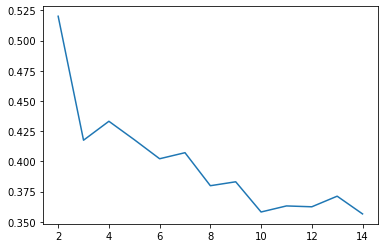

In [270]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])

### sum of squared distance 

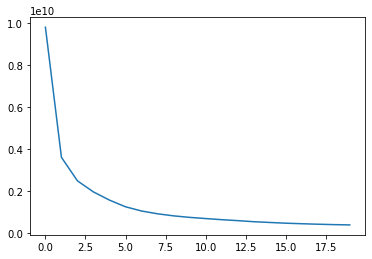

In [271]:
ssd = []
for num_clusters in list(range(1, 21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50)
    model_clus.fit(rfm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [324]:
model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(rfm)

KMeans(n_clusters=5)

In [325]:
# analysis of the clusters formed

In [326]:
rfm.index = pd.RangeIndex(len(rfm.index))
rfm_km = pd.concat([rfm, pd.Series(model_clus5.labels_)], axis = 1)

In [327]:
rfm_km.head()

,Customer ID,recency,frequency,amount,0
0,12608.0,334,1,415.79,3
1,12745.0,252,2,723.85,3
2,12746.0,211,3,230.85,3
3,12749.0,353,8,2460.29,0
4,12777.0,281,1,519.45,3


In [328]:
rfm_km.columns

Index(['Customer ID', 'recency', 'frequency', 'amount', 0], dtype='object')

In [329]:
# 0 is here the cluster id 
rfm_km.cluster_amount = pd.DataFrame(rfm_km.groupby([0])['amount'].mean())
rfm_km.cluster_frequency = pd.DataFrame(rfm_km.groupby([0])['frequency'].mean())
rfm_km.cluster_recency = pd.DataFrame(rfm_km.groupby([0])['recency'].mean())
print(rfm_km.cluster_amount, rfm_km.cluster_frequency, rfm_km.cluster_recency)

        amount
0             
0  1763.190503
1   473.534867
2   491.955970
3   445.650365
4  1839.480784    frequency
0           
0   6.309896
1   2.501114
2   2.493072
3   2.375000
4   6.324324       recency
0            
0  324.932292
1  275.230512
2  271.198614
3  271.721250
4  327.627027


In [330]:
final_mean = pd.concat([pd.Series([0,1,2,3,4]), rfm_km.cluster_amount, rfm_km.cluster_frequency, rfm_km.cluster_recency], axis=1)


In [331]:
final_mean.columns = ["cluster_id", "amount_mean", "frequency_mean", "recency_mean"]
final_mean

,cluster_id,amount_mean,frequency_mean,recency_mean
0,0,1763.190503,6.309896,324.932292
1,1,473.534867,2.501114,275.230512
2,2,491.955970,2.493072,271.198614
3,3,445.650365,2.375000,271.721250
4,4,1839.480784,6.324324,327.627027


<AxesSubplot:xlabel='cluster_id', ylabel='amount_mean'>

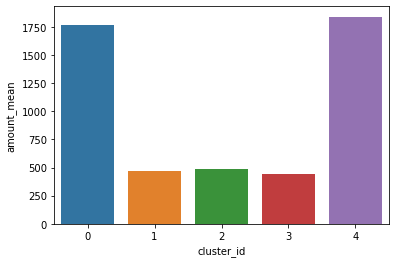

In [332]:
sns.barplot(x=final_mean.cluster_id, y=final_mean.amount_mean)

<AxesSubplot:xlabel='cluster_id', ylabel='frequency_mean'>

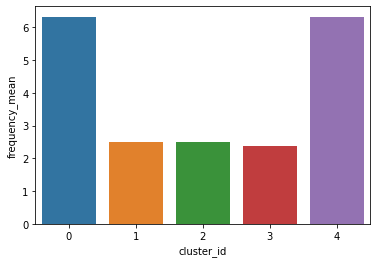

In [333]:
sns.barplot(x=final_mean.cluster_id, y=final_mean.frequency_mean)

<AxesSubplot:xlabel='cluster_id', ylabel='recency_mean'>

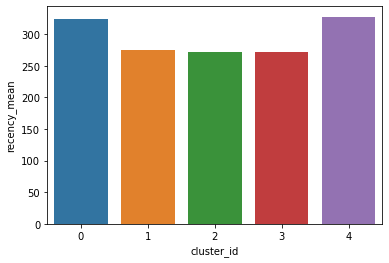

In [334]:
sns.barplot(x=final_mean.cluster_id, y=final_mean.recency_mean)

### inference: as per the above analysis we could segment the customers in the categories...as we can see some peoples tend to spend little so we could provide some gift cards, or some extra offers to retain them

### while some sements of peoples also tend to apper less so we can provide extra bonuses on frequent shopping!

### ans as per the third plot all segments tend to appear with almost the same recency